# Latihan Implementasi Reinforcement Learning

[Colab link (DICODING)](https://colab.research.google.com/drive/1UXkMqC3admeEsPp2kllD788tfX_upDvV?usp=sharing)

## Import Modules dan Packages

In [41]:
import numpy as np
import gym
import pickle

## Inisialisasi Environment

Setting dimana agent dapat belajar dan berikteraksi dengan lingkungannya

### Membuat Peta Grid

Kita menggunakan peta yang direpresentasikan dalam bentuk string dua dimensi, yakni setiap karakter mewakili elemen pada grid. Ada empat komponen utama dalam peta.

- S: Start, yakni posisi awal agen.
- F: Frozen, yaitu petak es yang aman untuk dilewati.
- H: Hole, yakni lubang yang menyebabkan agen jatuh dan episode berakhir.
- G: Goal, yaitu tujuan akhir yang harus dicapai oleh agen.

Kemudian, kita mendefinisikan beberapa peta yang akan digunakan dalam permainan Frozen Lake. 

Setiap peta adalah string dua dimensi yang mewakili grid permainan.

In [42]:
# Membuat daftar peta
peta = [
    ['SFFF','FHFH','FFFH','HFFG'],
    ['SFFF','FFHF','HFFF','HFFG'],
    ['SHFF','FHFH','FFFH','HHFG'],
    ['SFFF','HHFF','FFFF','HFFG'],
    ['SFFH','FFFH','HFFH','HHFG']
]

In [43]:
# Memuat lingkungan
env = gym.make("FrozenLake-v0",is_slippery=False, desc=peta[0])

Kemudian, kita akan menghitung berapa banyak petak atau posisi tersedia di atas permukaan es (state) dan berapa banyak langkah yang dapat diambil oleh agen untuk bergerak di sekitar permukaan es (action).

In [44]:
n_observations = env.observation_space.n
n_actions      = env.action_space.n
    
print('Banyak State  : ' + str(n_observations))
print('Banyak Action : ' + str(n_actions))

Banyak State  : 16
Banyak Action : 4


In [45]:
print(env.action_space)

Discrete(4)


In [46]:
ACTION = ["KIRI","BAWAH","KANAN","ATAS"]

Terakhir, kita mengatur ulang lingkungan ke keadaan awalnya dan menampilkan visualisasi permainan menggunakan perintah env.reset() dan env.render().



In [47]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


### Menguji Langkah Agent

In [48]:
# Langkah 1 (ke Kanan)
new_state, reward, done, info = env.step(2)

# Menampilkan informasi
print(f"New State: {new_state}")
print(f"Reward: {reward}")
print(f"Done: {done}")
print(f"Info: {info}")

# Menampilkan visualisasi lingkungan
env.render()

New State: 1
Reward: 0.0
Done: False
Info: {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG


In [49]:
# Langkah 2 (ke Kanan)
new_state, reward, done, info = env.step(2)
    
# Menampilkan informasi
print(f"New State : {new_state}")
print(f"Reward    : {reward}")
print(f"Done      : {done}")
print(f"Info      : {info}")
    
# Menampilkan visualisasi lingkungan
env.render()

New State : 2
Reward    : 0.0
Done      : False
Info      : {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG


In [50]:
# Langkah 3 (ke Bawah)
new_state, reward, done, info = env.step(1)
    
# Menampilkan informasi
print('New State : {}'.format(new_state))
print('Reward    : {}'.format(reward))
print('Done      : {}'.format(done))
print('Info      : {}'.format(info))
    
# Menampilkan visualisasi lingkungan
env.render()

New State : 6
Reward    : 0.0
Done      : False
Info      : {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG


In [51]:
# Langkah 4 (ke Bawah)
new_state, reward, done, info = env.step(1)
    
# Menampilkan informasi
print('New State : {}'.format(new_state))
print('Reward    : {}'.format(reward))
print('Done      : {}'.format(done))
print('Info      : {}'.format(info))
    
# Menampilkan visualisasi lingkungan
env.render()

New State : 10
Reward    : 0.0
Done      : False
Info      : {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG


In [52]:
# Langkah 5 (ke Bawah)
new_state, reward, done, info = env.step(1)
    
# Menampilkan informasi
print(f"New State : {new_state}")
print(f"Reward    : {reward}")
print(f"Done      : {done}")
print(f"Info      : {info}")
    
# Menampilkan visualisasi lingkungan
env.render()

New State : 14
Reward    : 0.0
Done      : False
Info      : {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG


In [53]:
# Langkah 6 (ke Kanan)
new_state, reward, done, info = env.step(2)
    
# Menampilkan informasi
print(f"New State : {new_state}")
print(f"Reward    : {reward}")
print(f"Done      : {done}")
print(f"Info      : {info}")
    
# Menampilkan visualisasi lingkungan
env.render()

New State : 15
Reward    : 1.0
Done      : True
Info      : {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG


Dengan berhasil mencapai tujuan akhir, agen telah menyelesaikan permainan Frozen Lake dengan sukses, dan permainan ini sekarang berakhir. 

## Model Training

Setelah mencapai tujuan akhir pada permainan Frozen Lake, langkah selanjutnya adalah melakukan pelatihan model untuk meningkatkan kinerja agen dalam permainan ini. Model training melibatkan penggunaan algoritma reinforcement learning, seperti Q-learning untuk mengoptimalkan keputusan agen saat berinteraksi dengan lingkungan. Dalam konteks ini, langkah-langkah selanjutnya akan mencakup proses iteratif bahwa agen akan terus berinteraksi dengan lingkungan, memperbarui nilai-nilai Q untuk setiap tindakan yang diambil, dan belajar dari pengalaman guna meningkatkan strategi permainannya. 

In [64]:
def train_agent(env, n_episodes=10000, max_iter_episode=100, exploration_proba=1, exploration_decreasing_decay=0.001, min_exploration_proba=0.01, gamma=0.99, lr=0.1):
    # Inisialisasi Q-table dengan ukuran berdasarkan banyak state dan action
    Q_table = np.zeros((env.observation_space.n, env.action_space.n))

    # List untuk menyimpan reward dari setiap episode
    rewards_per_episode = []

    # Looping untuk setiap episode
    for episode in range(n_episodes):
        # Reset lingkungan untuk memulai episode baru dan mendapatkan state awal
        state = env.reset()

        # Inisialisasi total reward episode menjadi 0
        episode_reward = 0

        # Looping untuk setiap iterasi dalam episode
        for _ in range(max_iter_episode):
            # Pilih tindakan berdasarkan probabilitas eksplorasi atau menggunakan kebujakan Q
            if np.random.uniform(0, 1) < exploration_proba:
                action = env.action_space.sample() # Aksi acak (eksplorasi)
            else:
                action = np.argmax(Q_table[state, :]) # Aksi terbaik berdasarkan Q-table (eksploitasi)

            # Ambil langkah berdasarkan aksi yang dipilih
            next_state, reward, done, _ = env.step(action)

            # Update Q-table berdasarkan reward yang diterima dan perkiraan nilai Q di state berikutnya
            Q_table[state, action] = (1-lr) * Q_table[state, action] + lr * (reward + gamma * np.max(Q_table[next_state, :]))

            # Tambahkan reward dari langkah ini ke total reward episode
            episode_reward += reward
            state = next_state # Pindah ke state berikutnya

            if done:
                break

        # Kurangi probabilitas eksplorasi setiap episode
        exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*episode))

        # Simpan total reward episode ke dalam list
        rewards_per_episode.append(episode_reward)

    # Cetak total reward episode setiap 100 episode
    print("Rata-rata Reward per 1000 episode: ")
    for i in range(10):
        print((i+1)*1000, " : Rata-rata Reward = ", np.mean(rewards_per_episode[i*1000:(i+1)*1000]))

    # Kembalikan Q-table yang telah dilatih
    return Q_table

Model training ini untuk menghasilkan kebijakan optimal yang memungkinkan agen mencapai tujuan akhir dengan efisien dan konsisten. Selama proses training, agen akan menghadapi berbagai situasi dan memperdalam pemahaman tentang lingkungan sehingga dapat membuat keputusan yang lebih baik di masa depan. Demikianlah, model training merupakan tahap penting dalam pengembangan agen cerdas yang mampu menyelesaikan permainan Frozen Lake dengan keberhasilan konsisten.

In [65]:
Q_table_all = [] # List untuk menyimpan Q-table dari setiap peta

for peta_env in peta: # Loop melalui setiap peta dalam daftar peta
    # Load Environment untuk setiap peta dengan konfigurasi tertentu
    env = gym.make("FrozenLake-v0", is_slippery=False, desc=peta_env)
    env.reset()  # Reset lingkungan ke keadaan awal
 
    print('Peta : ')
    print(peta_env)  # Cetak peta yang sedang digunakan
 
    # Melatih Agent pada lingkungan saat ini
    Q_table = train_agent(env)  # Panggil fungsi train_agent untuk melatih agen di lingkungan saat ini
 
    # Menyimpan Q_table untuk lingkungan saat ini ke dalam list
    Q_table_all.append(Q_table)  # Tambahkan Q_table ke dalam list Q_table_all
 
    print()  # Cetak baris kosong untuk pemisah antara lingkungan yang berbeda


Peta : 
['SFFF', 'FHFH', 'FFFH', 'HFFG']
Rata-rata Reward per 1000 episode: 
1000  : Rata-rata Reward =  0.262
2000  : Rata-rata Reward =  0.755
3000  : Rata-rata Reward =  0.918
4000  : Rata-rata Reward =  0.973
5000  : Rata-rata Reward =  0.993
6000  : Rata-rata Reward =  0.99
7000  : Rata-rata Reward =  0.991
8000  : Rata-rata Reward =  0.984
9000  : Rata-rata Reward =  0.992
10000  : Rata-rata Reward =  0.99

Peta : 
['SFFF', 'FFHF', 'HFFF', 'HFFG']
Rata-rata Reward per 1000 episode: 
1000  : Rata-rata Reward =  0.399
2000  : Rata-rata Reward =  0.861
3000  : Rata-rata Reward =  0.962
4000  : Rata-rata Reward =  0.986
5000  : Rata-rata Reward =  0.992
6000  : Rata-rata Reward =  0.992
7000  : Rata-rata Reward =  0.99
8000  : Rata-rata Reward =  0.994
9000  : Rata-rata Reward =  0.993
10000  : Rata-rata Reward =  0.996

Peta : 
['SHFF', 'FHFH', 'FFFH', 'HHFG']
Rata-rata Reward per 1000 episode: 
1000  : Rata-rata Reward =  0.0
2000  : Rata-rata Reward =  0.0
3000  : Rata-rata Reward

## Memainkan Agen yang Telah Dilatih

Setelah melatih model dengan salah satu peta, langkah selanjutnya adalah memainkan agen yang telah dilatih di lingkungan tersebut. Dalam skrip ini, kita memilih peta dengan mengatur nilai variabel index_peta sesuai keinginan. Kemudian, lingkungan Frozen Lake dibuat menggunakan peta yang dipilih dan permainan dimulai dengan me-reset lingkungan.

In [66]:
index_peta = 0

env = gym.make("FrozenLake-v0", is_slippery=False, desc=peta[index_peta])
env.reset()

0

In [67]:
env.render()


SFFF
FHFH
FFFH
HFFG


Selanjutnya, agen melakukan permainan dengan menggunakan tabel Q yang telah dilatih sebelumnya. Dalam setiap langkah, agen memilih aksi terbaik berdasarkan tabel Q yang telah dipelajari. Informasi tentang langkah tersebut dicetak, termasuk nomor langkah, aksi terbaik oleh agen, keadaan baru setelah langkah, reward yang diterima, dan status episode permainan telah selesai atau belum.

In [68]:
Q_table = Q_table_all[index_peta]
print(Q_table)

[[9.41480149e-01 9.50990050e-01 9.32065338e-01 9.41480149e-01]
 [9.41480149e-01 0.00000000e+00 6.79141618e-01 8.85380622e-01]
 [3.63575349e-01 8.96346302e-01 1.89111905e-02 1.22602375e-01]
 [1.63318630e-01 0.00000000e+00 4.68871464e-03 1.09378831e-07]
 [9.50990046e-01 9.60596010e-01 0.00000000e+00 9.41480149e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.80099757e-01 0.00000000e+00 4.26143528e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.60596009e-01 0.00000000e+00 9.70299000e-01 9.50990031e-01]
 [9.60595904e-01 9.80099913e-01 9.80100000e-01 0.00000000e+00]
 [9.70298895e-01 9.90000000e-01 0.00000000e+00 9.70295977e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.83751370e-01 9.90000000e-01 8.81842160e-01]
 [9.80099670e-01 9.89999966e-01 1.00000000e+00 9.80099507e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [69]:
for langkah in range(1,7):
    if langkah == 1:
        best_action = np.argmax(Q_table_all[index_peta][0])
    else:
        best_action = np.argmax(Q_table_all[index_peta][current_state])

    new_state, reward, done, info = env.step(best_action)

    # Cetak informasi langkah
    print('--------------------------------------')
    print('Langkah ke  :', langkah)
    print('Best Action :', ACTION[best_action])
    print('New State   :', new_state)
    print('Reward      :', reward)
    print('Done        :', done)
 
    # Tampilkan visualisasi lingkungan
    env.render()
    current_state = new_state  # Perbarui state saat ini
 
    print()

--------------------------------------
Langkah ke  : 1
Best Action : BAWAH
New State   : 4
Reward      : 0.0
Done        : False
  (Down)
SFFF
FHFH
FFFH
HFFG

--------------------------------------
Langkah ke  : 2
Best Action : BAWAH
New State   : 8
Reward      : 0.0
Done        : False
  (Down)
SFFF
FHFH
FFFH
HFFG

--------------------------------------
Langkah ke  : 3
Best Action : KANAN
New State   : 9
Reward      : 0.0
Done        : False
  (Right)
SFFF
FHFH
FFFH
HFFG

--------------------------------------
Langkah ke  : 4
Best Action : KANAN
New State   : 10
Reward      : 0.0
Done        : False
  (Right)
SFFF
FHFH
FFFH
HFFG

--------------------------------------
Langkah ke  : 5
Best Action : BAWAH
New State   : 14
Reward      : 0.0
Done        : False
  (Down)
SFFF
FHFH
FFFH
HFFG

--------------------------------------
Langkah ke  : 6
Best Action : KANAN
New State   : 15
Reward      : 1.0
Done        : True
  (Right)
SFFF
FHFH
FFFH
HFFG



## Evaluasi

In [70]:
for peta_env in peta:  # Iterasi melalui setiap peta dalam daftar peta
    print("Peta   :", peta_env)  # Cetak deskripsi peta yang sedang diperiksa
    
    env = gym.make("FrozenLake-v0", is_slippery=False, desc=peta_env)  # Buat lingkungan permainan Frozen Lake
    env.reset()  # Atur ulang lingkungan ke keadaan awal
    
    # Iterasi untuk agen melakukan langkah-langkah dalam lingkungan
    for langkah in range(1, 7):
        if langkah == 1:
            best_action = np.argmax(Q_table_all[index_peta][0])  # Ambil tindakan terbaik untuk langkah pertama
        else:
            best_action = np.argmax(Q_table_all[index_peta][current_state])  # Ambil tindakan terbaik berdasarkan state saat ini
    
        new_state, reward, done, info = env.step(best_action)  # Lakukan langkah terbaik dalam lingkungan
    
        current_state = new_state  # Perbarui state saat ini
    
    # Periksa apakah agen berhasil menyelesaikan permainan
    if done:
        print("Status : Agent dapat menyelesaikan peta ini")  # Cetak pesan jika agen berhasil menyelesaikan permainan
    else:
        print("Status : Agent tidak dapat menyelesaikan peta ini")  # Cetak pesan jika agen gagal menyelesaikan permainan
    
    print()  # Cetak baris kosong sebagai pemisah antara hasil dari setiap peta

Peta   : ['SFFF', 'FHFH', 'FFFH', 'HFFG']
Status : Agent dapat menyelesaikan peta ini

Peta   : ['SFFF', 'FFHF', 'HFFF', 'HFFG']
Status : Agent dapat menyelesaikan peta ini

Peta   : ['SHFF', 'FHFH', 'FFFH', 'HHFG']
Status : Agent dapat menyelesaikan peta ini

Peta   : ['SFFF', 'HHFF', 'FFFF', 'HFFG']
Status : Agent dapat menyelesaikan peta ini

Peta   : ['SFFH', 'FFFH', 'HFFH', 'HHFG']
Status : Agent dapat menyelesaikan peta ini



## Menyimpan Model

In [72]:
# Simpan tabel Q yang telah dilatih menggunakan modul pickle
pickle.dump(Q_table_all, open('Q_table_Frozen_Lake.model', 'wb'))
    
# Penjelasan penutup
print("Tabel Q untuk lingkungan Frozen Lake telah berhasil disimpan dalam file 'Q_table_Frozen_Lake.model'. Proses pelatihan agen dan penyimpanan tabel Q ini memungkinkan untuk digunakan kembali dalam pengujian atau aplikasi selanjutnya tanpa perlu melakukan pelatihan ulang.")

Tabel Q untuk lingkungan Frozen Lake telah berhasil disimpan dalam file 'Q_table_Frozen_Lake.model'. Proses pelatihan agen dan penyimpanan tabel Q ini memungkinkan untuk digunakan kembali dalam pengujian atau aplikasi selanjutnya tanpa perlu melakukan pelatihan ulang.


## Note

Slippery itu maksudnya dia ga selalu sesuai perintah, misal disuru kanan bisa aja dia diem or ke kiri or anything

## Quiz

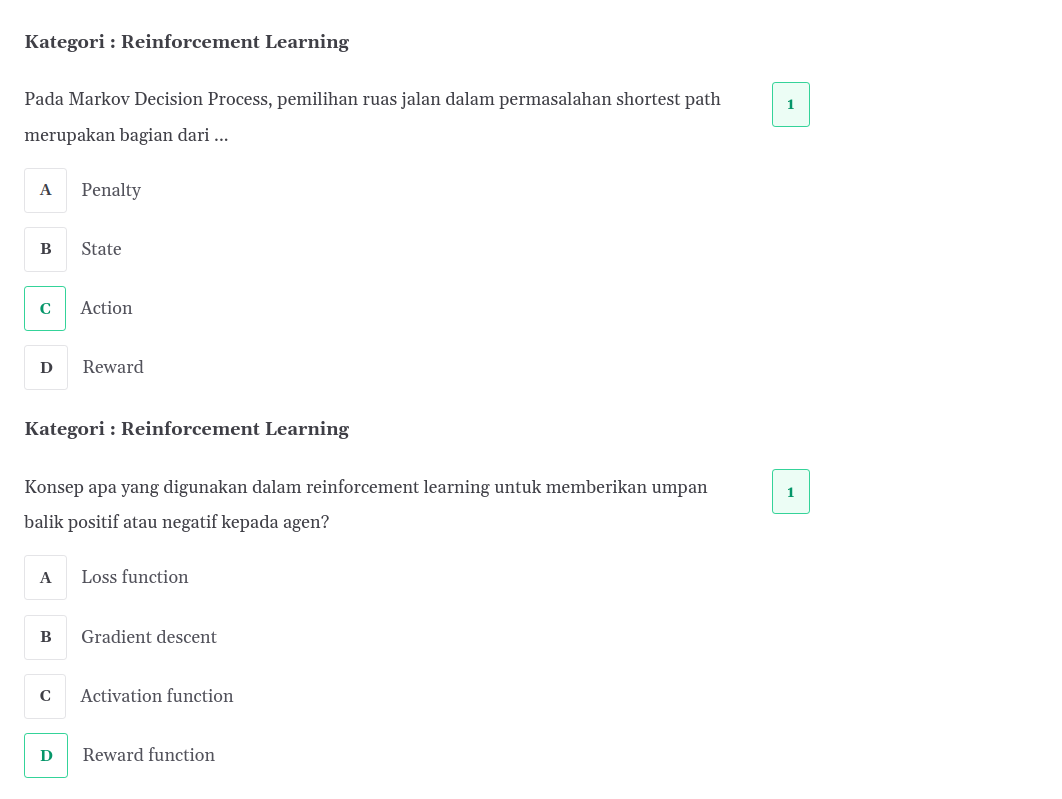
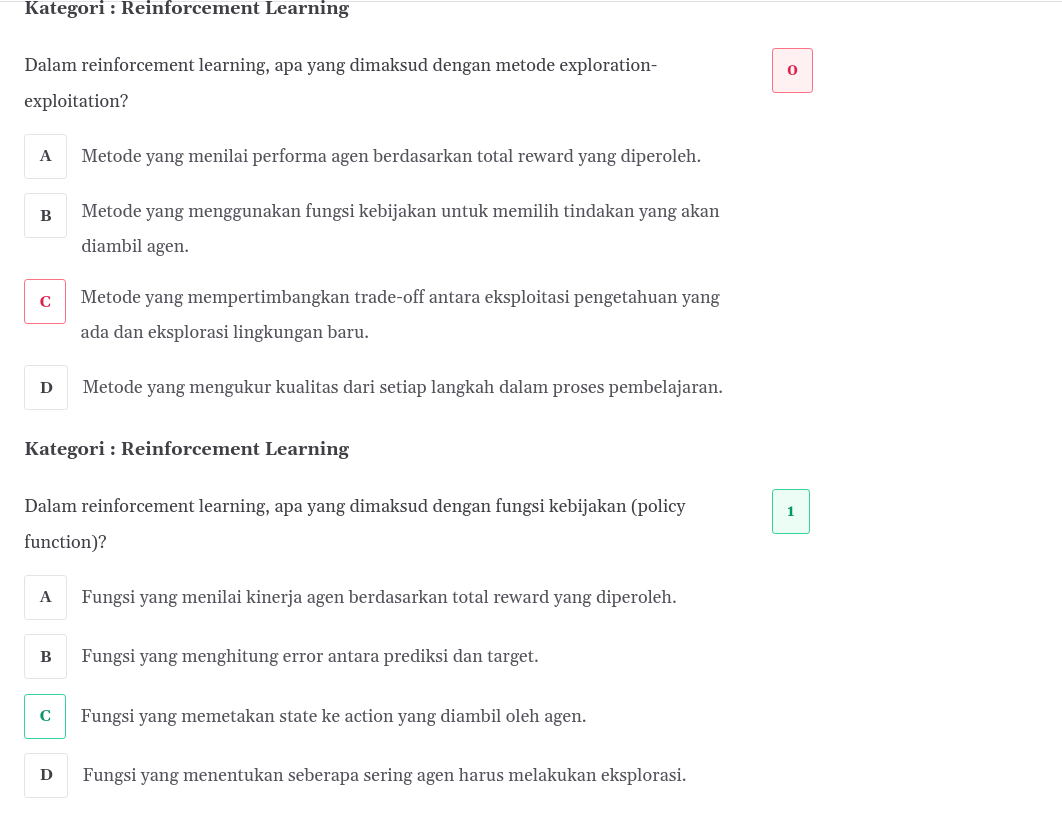